In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from source import explore as ex
from source import utility as ut

pd.set_option('max_columns', 100)

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
subs = pd.read_csv('data/sample_submission.csv')

print(df_train.shape)
print(df_test.shape)
print(subs.shape)

df_train.head()

(300000, 26)
(200000, 25)
(200000, 2)


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
df_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,G,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,L,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,F,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,F,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,I,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [4]:
subs.head()

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5


In [5]:
ex.list_missing(df_train)
print('_'*40)
ex.list_missing(df_test)

________________________________________


[]

# First look

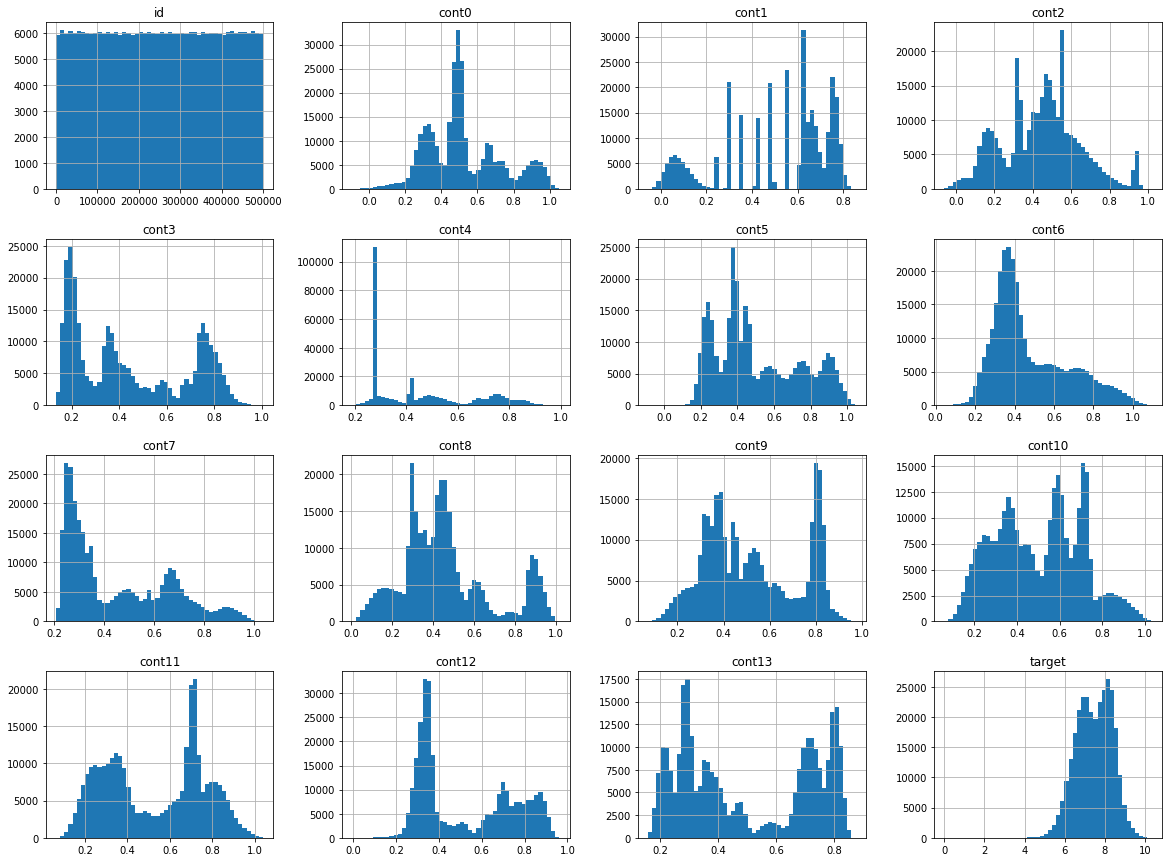

In [6]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

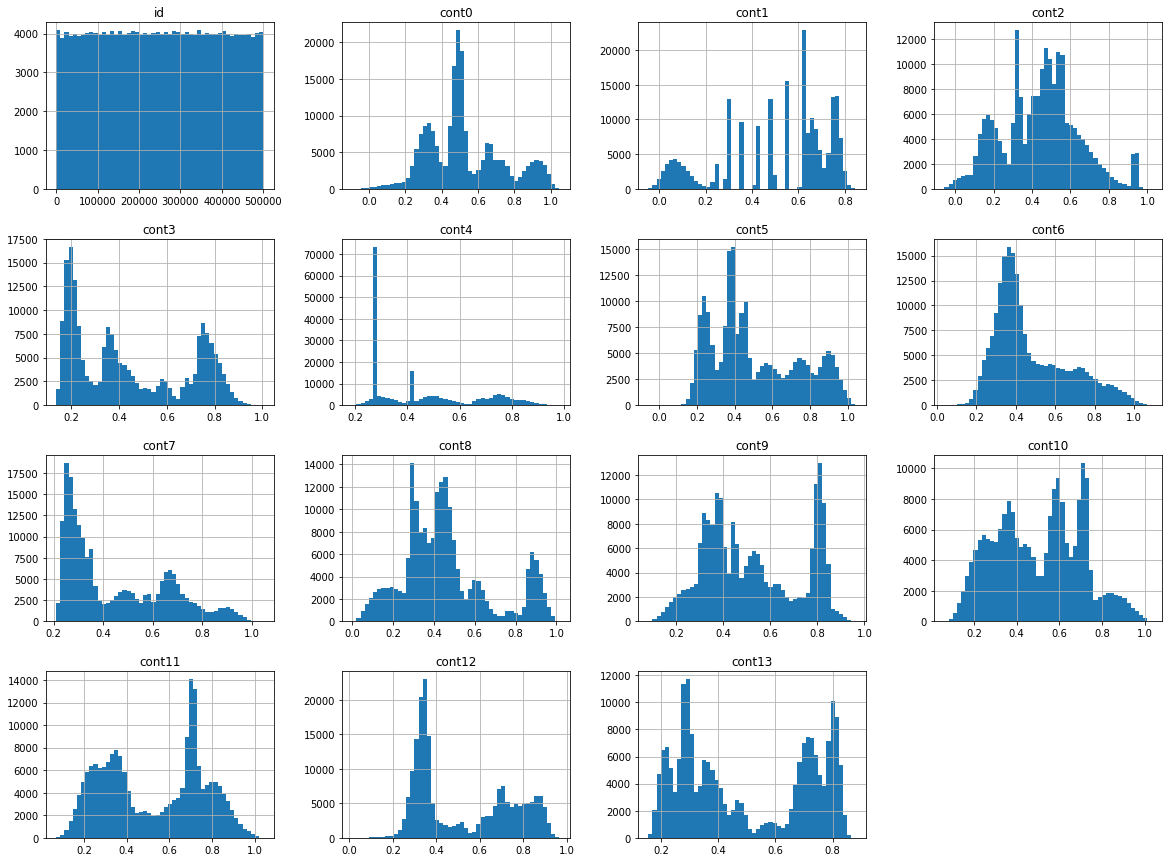

In [7]:
df_test.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
for col in [col for col in df_train if 'cat' in col]:
    print(col)
    print('\n')
    print(f'Train: {df_train[col].nunique()} unique values')
    print(df_train[col].value_counts().head(10))
    print('\n')
    print('_'*40)
    print('\n')
    print(f'Test: {df_test[col].nunique()} unique values')
    print(df_test[col].value_counts().head(10))
    print('\n')
    print(f'Category mismatch: {set(df_train[col]) - set(df_test[col])} - {set(df_test[col]) - set(df_train[col])}')
    print('_'*40)
    print('_'*40)
    print('\n')

cat0


Train: 2 unique values
A    281471
B     18529
Name: cat0, dtype: int64


________________________________________


Test: 2 unique values
A    187700
B     12300
Name: cat0, dtype: int64


Category mismatch: set() - set()
________________________________________
________________________________________


cat1


Train: 2 unique values
A    162678
B    137322
Name: cat1, dtype: int64


________________________________________


Test: 2 unique values
A    108047
B     91953
Name: cat1, dtype: int64


Category mismatch: set() - set()
________________________________________
________________________________________


cat2


Train: 2 unique values
A    276551
B     23449
Name: cat2, dtype: int64


________________________________________


Test: 2 unique values
A    184259
B     15741
Name: cat2, dtype: int64


Category mismatch: set() - set()
________________________________________
________________________________________


cat3


Train: 4 unique values
C    183752
A    104464
D   

In [9]:
train_set, test_set = ut.make_test(df_train, 0.25, random_state=516, strat_feat='cat9')

train_set.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
217278,362397,A,A,A,A,B,D,A,E,G,F,0.992968,0.062644,0.137455,0.771707,0.494401,0.889793,0.477072,0.777355,0.894772,0.832945,0.528586,0.712178,0.876089,0.594609,6.405349
168076,280139,A,A,A,A,B,A,A,E,A,F,0.706340,0.297613,0.574490,0.685358,0.280016,0.980636,0.875379,0.650188,0.210627,0.543731,0.551951,0.821223,0.898238,0.422612,7.616449
85899,142986,B,B,A,C,B,D,A,E,G,M,0.735604,0.770009,0.350257,0.561776,0.266121,0.918674,0.828429,0.345399,0.901242,0.759109,0.726503,0.637654,0.901267,0.729128,7.678379
66230,110149,A,B,A,C,B,D,A,E,G,I,0.855760,0.617747,0.145037,0.218510,0.677832,0.520412,0.304368,0.676240,0.862597,0.153856,0.177909,0.848022,0.311321,0.766169,6.642889
202344,337370,A,A,A,C,B,B,A,E,C,F,0.397990,0.069838,0.452991,0.174816,0.775703,0.305720,0.349109,0.702810,0.304682,0.441488,0.240995,0.381703,0.302658,0.719237,8.427913


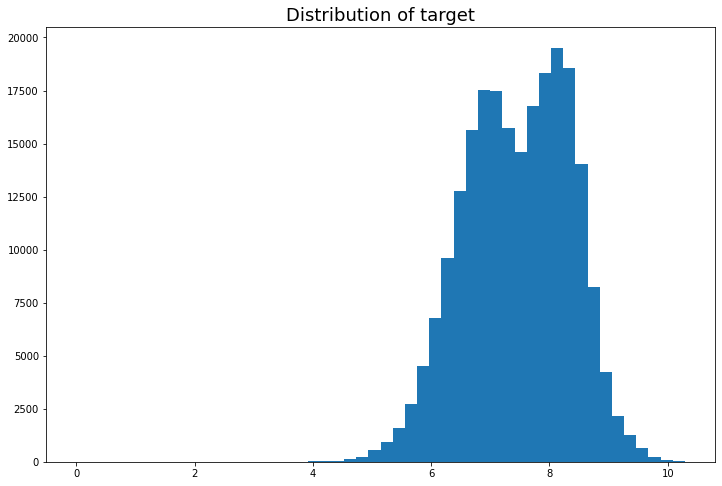

In [10]:
ex.plot_distribution(train_set, 'target')

# Correlations

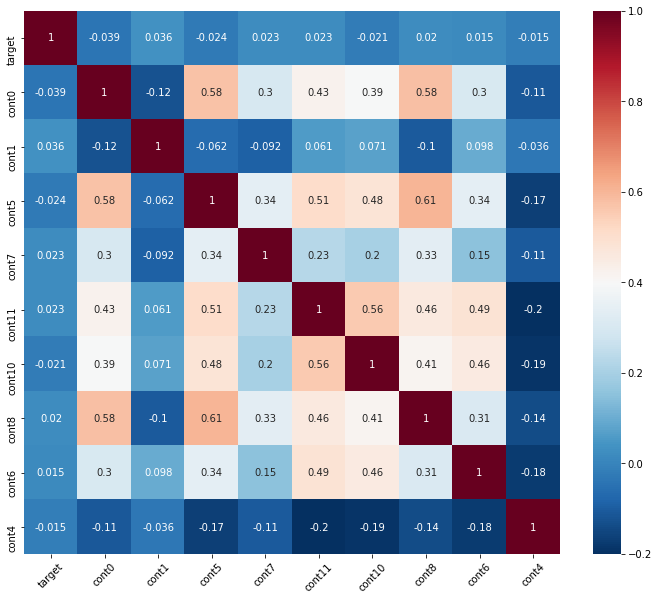

In [11]:
high_corr = ex.plot_correlations(train_set, 'target', limit=10, annot=True)

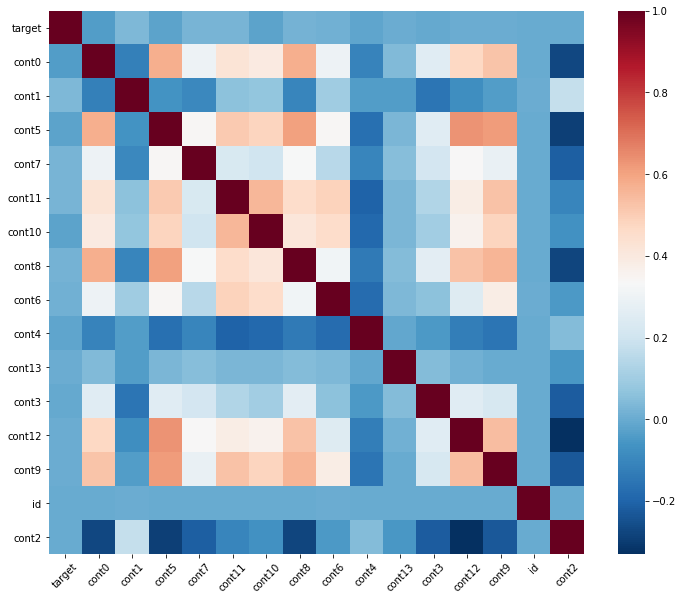

In [12]:
high_corr = ex.plot_correlations(train_set, 'target', limit=20)

In [13]:
ex.find_cats(train_set, 'target', thrs=0.3, critical=0.05)

Column cat0 throws the following error: Data passed to ks_2samp must not be empty
Column cat2 throws the following error: Data passed to ks_2samp must not be empty
Column cat4 throws the following error: Data passed to ks_2samp must not be empty
Column cat6 throws the following error: Data passed to ks_2samp must not be empty
Column cat7 throws the following error: Data passed to ks_2samp must not be empty
Column cat9 throws the following error: Data passed to ks_2samp must not be empty


['cat1', 'cat3', 'cat5', 'cat8']

,count,mean,max,min,median,std,skew
cat0,,,,,,,
A,211107,7.469375,10.290965,0.000000,7.520391,0.887392,-0.219758
B,13893,7.271038,9.999064,3.343646,7.219736,0.859244,-0.004106


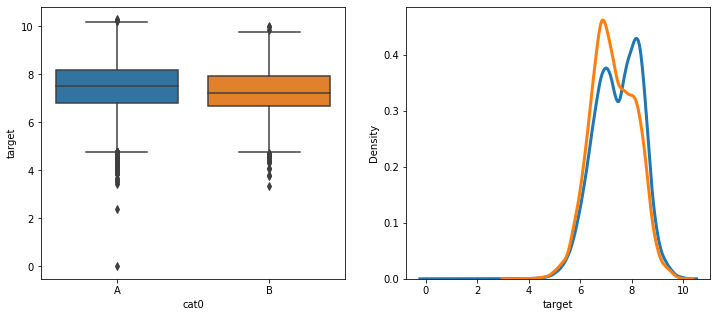

In [14]:
ex.segm_target(train_set, 'cat0', 'target')

,count,mean,max,min,median,std,skew
cat1,,,,,,,
A,122019,7.358996,10.185468,3.343646,7.356738,0.861598,-0.184837
B,102981,7.573401,10.290965,0.000000,7.663070,0.902405,-0.269165


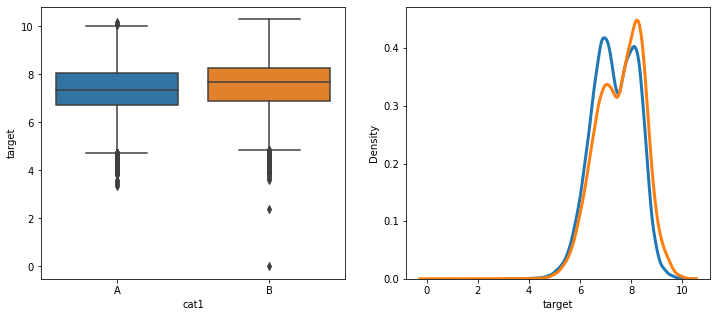

In [15]:
ex.segm_target(train_set, 'cat1', 'target')

,count,mean,max,min,median,std,skew
cat2,,,,,,,
A,207411,7.430486,10.192781,0.000000,7.459668,0.881630,-0.198394
B,17589,7.771287,10.290965,3.864506,7.915341,0.889338,-0.382471


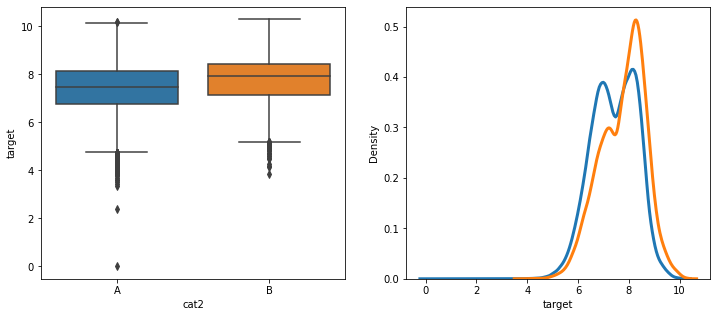

In [16]:
ex.segm_target(train_set, 'cat2', 'target')

,count,mean,max,min,median,std,skew
cat3,,,,,,,
A,78210,7.386107,10.168022,2.391029,7.450277,0.898841,-0.274348
B,461,7.472042,9.810512,3.976097,7.539525,0.892081,-0.253984
C,137951,7.498290,10.290965,0.000000,7.526661,0.877777,-0.163025
D,8378,7.441518,10.018801,4.135910,7.458774,0.883279,-0.111430


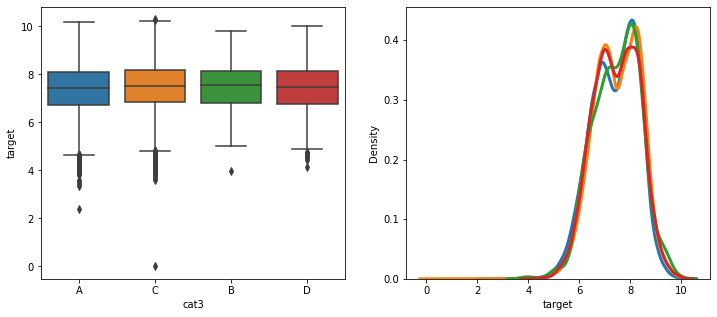

In [17]:
ex.segm_target(train_set, 'cat3', 'target')

,count,mean,max,min,median,std,skew
cat4,,,,,,,
A,928,7.471302,9.523636,4.198895,7.592047,0.876869,-0.386282
B,223021,7.456543,10.290965,0.000000,7.496774,0.886884,-0.203185
C,581,7.680262,9.801582,5.034262,7.852808,0.884206,-0.462803
D,470,7.430938,9.444592,3.873415,7.469200,0.915098,-0.354540


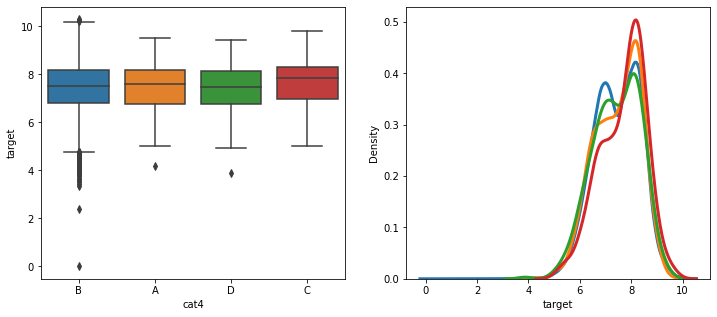

In [18]:
ex.segm_target(train_set, 'cat4', 'target')

,count,mean,max,min,median,std,skew
cat5,,,,,,,
A,2907,7.445839,10.101963,4.639607,7.445507,0.871938,0.021263
B,112151,7.462668,10.217871,0.000000,7.460569,0.861313,-0.126949
C,8783,7.160116,9.815627,3.529297,7.146091,0.916086,-0.177751
D,101159,7.477098,10.290965,2.391029,7.578372,0.908047,-0.282744


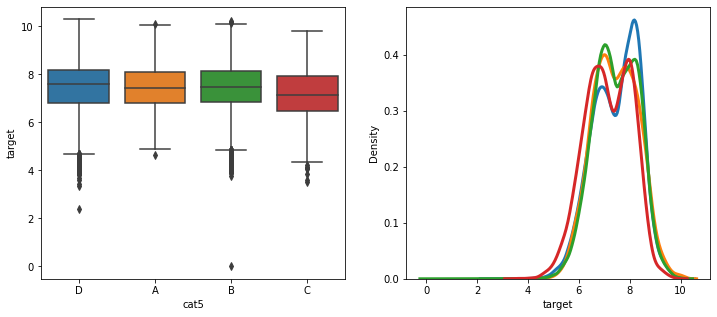

In [19]:
ex.segm_target(train_set, 'cat5', 'target')

,count,mean,max,min,median,std,skew
cat6,,,,,,,
A,219478,7.449356,10.192781,0.000000,7.485926,0.885520,-0.202640
B,4744,7.749778,10.069246,4.364669,7.899533,0.885306,-0.417518
C,614,7.952408,10.290965,5.235846,8.039104,0.901608,-0.199453
D,118,7.525472,9.581793,5.012878,7.650915,0.863000,-0.275861
E,14,7.616274,8.489366,6.791499,7.650612,0.519885,-0.096269
G,3,7.586153,8.492253,6.513197,7.753009,1.000023,-0.729931
H,9,7.370862,8.442170,5.186517,7.760364,1.101070,-1.014929
I,20,7.625391,9.277053,6.019833,7.616883,0.915015,0.119907


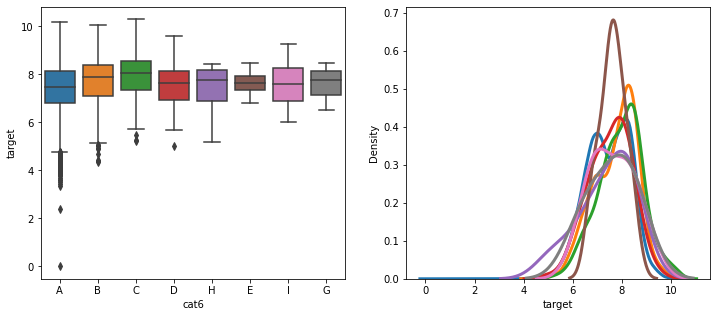

In [20]:
ex.segm_target(train_set, 'cat6', 'target')

,count,mean,max,min,median,std,skew
cat7,,,,,,,
A,12,7.533843,8.887043,5.768782,7.853474,0.942327,-0.657409
B,4312,7.479397,10.091566,3.964881,7.658013,0.926744,-0.373959
C,4,7.289597,8.613809,5.561182,7.491698,1.429046,-0.464732
D,18255,7.499138,10.073519,3.767636,7.621852,0.905610,-0.316462
E,200709,7.452976,10.290965,0.000000,7.485212,0.884858,-0.191656
F,207,7.484336,9.560212,5.391370,7.479147,0.788739,-0.118168
G,1498,7.432006,10.035878,4.932711,7.402021,0.817463,-0.041626
I,3,8.166376,8.603404,7.889124,8.006599,0.383008,1.550546


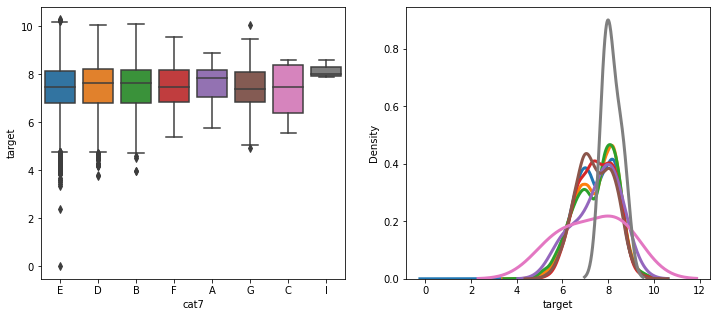

In [21]:
ex.segm_target(train_set, 'cat7', 'target')

,count,mean,max,min,median,std,skew
cat8,,,,,,,
A,28320,7.479772,10.185468,3.864506,7.518365,0.894434,-0.167693
B,11,7.525527,8.558835,6.725426,7.179209,0.688873,0.490654
C,90799,7.447361,10.192781,0.000000,7.477366,0.889009,-0.193985
D,2799,7.475744,9.859731,4.292279,7.454311,0.824608,-0.063943
E,71082,7.515641,10.290965,2.391029,7.564321,0.864669,-0.214944
F,404,7.583645,10.111447,4.524674,7.661295,0.872488,-0.389110
G,31585,7.329926,10.091566,3.615431,7.376885,0.915089,-0.213043


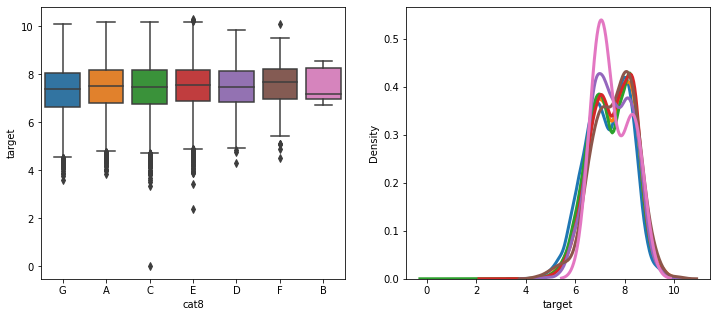

In [22]:
ex.segm_target(train_set, 'cat8', 'target')

,count,mean,max,min,median,std,skew
cat9,,,,,,,
A,10056,7.294782,9.999064,0.000000,7.242019,0.855966,-0.082229
B,2576,7.408022,9.680847,3.957463,7.387813,0.868765,-0.152264
C,157,7.613479,9.703485,5.577668,7.596732,0.889154,0.090166
D,77,7.345772,9.004700,5.591412,7.416960,0.803057,-0.107780
E,55,7.711639,9.620319,5.921770,7.715122,0.923123,-0.039305
F,80461,7.481652,10.290965,3.343646,7.609851,0.905403,-0.361173
G,7807,7.550797,10.110696,4.411925,7.636517,0.883328,-0.247667
H,18569,7.447641,10.023685,3.948042,7.485647,0.896651,-0.172826
I,37548,7.326877,10.085155,3.767636,7.264072,0.863815,0.012985


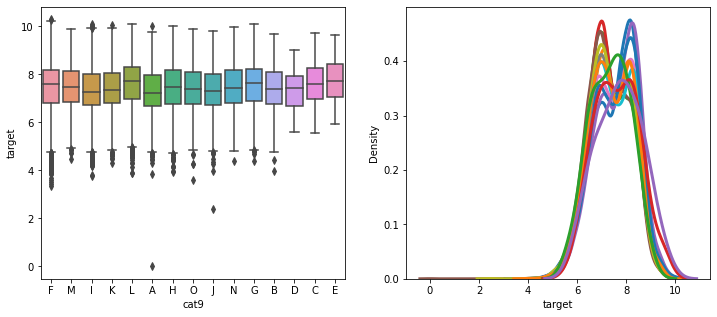

In [23]:
ex.segm_target(train_set, 'cat9', 'target')

# Interactions

In [15]:
train_set['cont8_cat0'] = np.where(train_set.cat0 == 'A', train_set['cont8'], 0)
train_set['cont8_cat2'] = np.where(train_set.cat2 == 'A', train_set['cont8'], 0)
train_set['cont1_cat0'] = np.where(train_set.cat0 == 'A', train_set['cont1'], 0)
train_set['cont5_cat1'] = np.where(train_set.cat1 == 'A', train_set['cont5'], 0)
train_set['cont13_cat1'] = np.where(train_set.cat1 == 'A', train_set['cont13'], 0)
train_set['cont9_cat0'] = np.where(train_set.cat0 == 'A', train_set['cont9'], 0)
train_set['cont9_cont12'] = train_set['cont9'] * train_set['cont12']
train_set['cont13_cat0'] = np.where(train_set.cat0 == 'A', train_set['cont13'], 0)

              cont8_cat0  cont8_cat2  cont1_cat0  cont5_cat1  cont13_cat1  \
cont8_cat0      1.000000    0.709917    0.134625    0.191384     0.005756   
cont8_cat2      0.709917    1.000000   -0.095326    0.266386     0.085723   
cont1_cat0      0.134625   -0.095326    1.000000    0.047529     0.053888   
cont5_cat1      0.191384    0.266386    0.047529    1.000000     0.698220   
cont13_cat1     0.005756    0.085723    0.053888    0.698220     1.000000   
cont9_cat0      0.666271    0.365733    0.228929    0.202976     0.004015   
cont9_cont12    0.545613    0.524036   -0.068705    0.297081     0.021352   
cont13_cat0     0.258162    0.020627    0.202250   -0.063999     0.275298   
target          0.042083   -0.034513    0.055381   -0.115257    -0.100600   

              cont9_cat0  cont9_cont12  cont13_cat0    target  
cont8_cat0      0.666271      0.545613     0.258162  0.042083  
cont8_cat2      0.365733      0.524036     0.020627 -0.034513  
cont1_cat0      0.228929     -0.06870

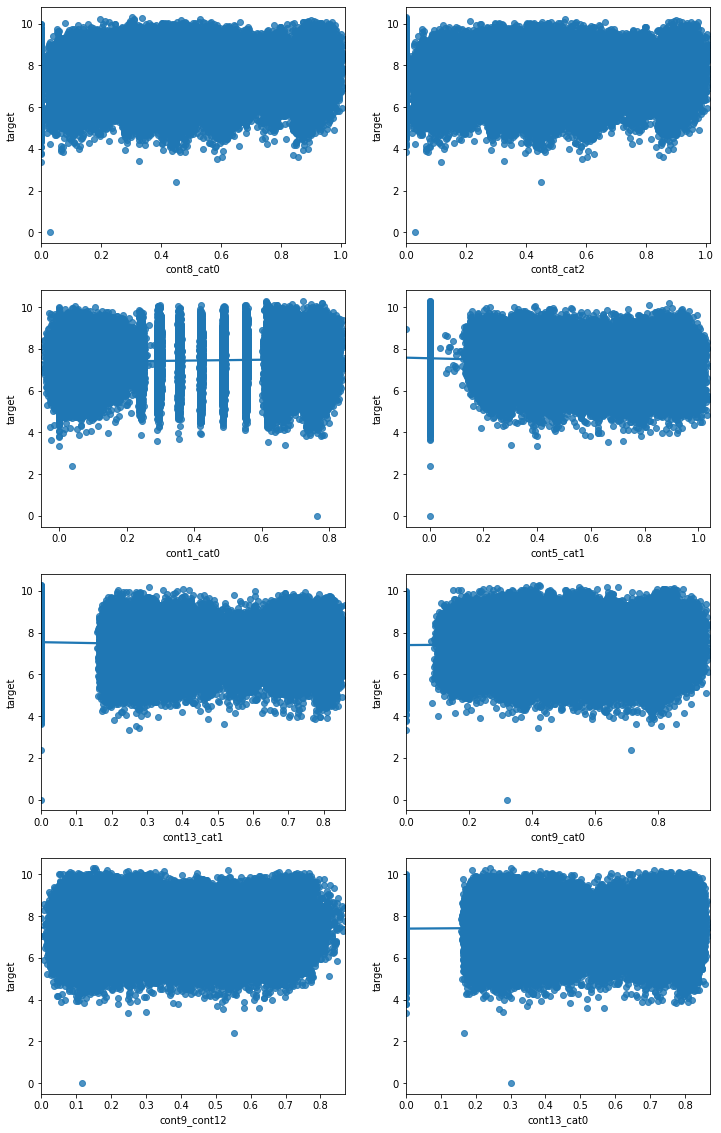

In [17]:
ex.corr_target(train_set, 'target', ['cont8_cat0', 'cont8_cat2', 'cont1_cat0', 'cont5_cat1', 
                                                'cont13_cat1', 'cont9_cat0', 'cont9_cont12', 'cont13_cat0'], x_estimator=None)